<a href="https://colab.research.google.com/github/daisuke-shimizu/python-Gakushuin-programming1/blob/main/Programming1_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# サンプルプログラム実行上の注意
プログラミング上達のコツは、

- 短時間に集中してできるだけ大量のプログラムを書くこと
- 試行錯誤を行うこと
- 他人の書いた（動く）プログラムを読むこと
- 更に、自分の目的に合わせてカスタマイズしてみること

を日常的に実行することです。
しかし、限られた授業時間（予習・復習も含む）内で、これらを十分に実行することは至難です。

そこで、
この講義資料は、多数のサンプルプログラムを提供して、
少しでも不足を補うことができるように作成されています。
受講者は、以下の注意を守ってサンプルプログラムをコードセル中で実行することで、
より効率の良い学習を心がけて下さい。

1. サンプルプログラムは、コピペせず、1行1行自分でタイプして書き写して下さい。
コピペでは見逃してしまう、プログラミングの書き方の規則や、プログラミングのコツなど、
自分自身でタイプすることで気づくことができます。
2. サンプルプログラムを書き写す時は、プログラムの意味を考えるよう努めて下さい。
最初は必ずしも最良とは言えないサンプルプログラムを提示して、
後で改良した例を示すなど、この講義資料では、良いプログラムを作成する考え方を効率的に学べるよう、
いろいろな工夫をしています。
3. 意味を理解できない行がある場合には、あまり拘泥せず、先に進んでください。
100%理解しないといけないという思い込みは、プログラミングの上達にとって妨げです。
理解するための努力は必要ですが、Pythonでできることの範囲は非常に広く、
プロのプログラマでも全部は理解していないでしょう。
完璧な理解よりも、**動くプログラムを書くことを最優先の目標**として、
わからない部分は「おまじない」として受け入れることができると、上達も早くなります。
「おまじない」とは、「なぜ効くのかはわからないけれども、使い方は分かっている」という意味です。

# 第9回　誕生日のパラドックス（その２）

いよいよ、誕生日のパラドックスを解析するプログラムを作成します。

準備として、以下を確認します。
1. Personクラスの定義
1. $N$人分のPersonオブジェクトの生成
2. Class 8-4の解答例
3. Class 8-5の解答例

## `Person`クラスの定義
この回のテーマである、誕生日パラドックスのシミュレーションでは、誕生日の情報のみを利用するので、
`Person`クラスの定義を以下のように簡略化して使用することにします。
```python
class Person:
    def __init__(self, bm, bd):
        self.birth_month = bm
        self.birth_date = bd
    month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    def birthday(self):
        month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
        return(month_names[self.birth_month] + str(self.birth_date))
```


## $N$人分のPersonオブジェクトの生成
誕生日パラドックスのシミュレーションでは、$N$を変えて、何度も`Person`オブジェクトの集合を生成します。
以下のプログラムは、$N$人分`Person`オブジェクトを生成し、リスト`persons`に格納します。
誕生日は、閏年も考慮に入れて、ランダムに決定されます。

```python
N = 100 # 値は必要に応じて変更する

def month_date(x):
    m = 0
    while x > 0:
        x -= month_len[m]
        m += 1
    return (m, x + month_len[m-1])

bm = []
bd = []
for _ in range(N):
    if random.choice([0, 1,2,3]) == 0:
        x = random.choice(range(1, 367))
        month_len = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        x = random.choice(range(1, 366))
        month_len = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    m, d = month_date(x)
    bm.append(m)
    bd.append(d)

persons = [Person(bm[n], bd[n]) for n in range(N)]
```

## 演習 8-4の解答例
リスト`persons`に現れる誕生日（例えば`'Jan1'`）の回数をカウントして、
その結果を辞書オブジェクト`count`中に記録するプログラムを作成することが目的です。
```python
birthdays = [p.birthday() for p in persons]
count = {}
for date in birthdays:
  if date in count:
    count[date] += 1
  else:
    count[date] = 1
```

In [2]:
import random

class Person:
    def __init__(self, bm, bd):
        self.birth_month = bm
        self.birth_date = bd
    def show(self):
        print("誕生月=", self.birth_month, "誕生日=", self.birth_date)
    month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
    def birthday(self):
        month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
        return(month_names[self.birth_month] + str(self.birth_date))

N = 100 # 値は必要に応じて変更する

def month_date(x):
    m = 0
    while x > 0:
        x -= month_len[m]
        m += 1
    return (m, x + month_len[m-1])

bm = []
bd = []
for _ in range(N):
    if random.choice([0, 1,2,3]) == 0:
        x = random.choice(range(1,367))
        month_len = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    else:
        x = random.choice(range(1,366))
        month_len = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    m, d = month_date(x)
    bm.append(m)
    bd.append(d)

persons = [Person(bm[n], bd[n]) for n in range(N)]

birthdays = [p.birthday() for p in persons]
count = {}
for date in birthdays:
  if date in count:
    count[date] += 1
  else:
    count[date] = 1
# 使用例
print(count)

{'May14': 1, 'May15': 2, 'Jan19': 2, 'Aug12': 1, 'Dec30': 1, 'Nov8': 1, 'May2': 2, 'Jul5': 1, 'Feb4': 3, 'Aug29': 2, 'Jan2': 1, 'Sep18': 1, 'Dec29': 1, 'Jan27': 1, 'Nov1': 1, 'Jul26': 2, 'Sep20': 2, 'Oct21': 1, 'Mar25': 1, 'Sep10': 1, 'Oct2': 1, 'Sep4': 1, 'Oct9': 1, 'Dec19': 1, 'Oct3': 1, 'Mar22': 1, 'Aug8': 2, 'Jan12': 1, 'Jan21': 1, 'Sep11': 1, 'Mar6': 1, 'Feb9': 1, 'Jun20': 1, 'May11': 1, 'Dec10': 1, 'Jan13': 1, 'May12': 1, 'Jun7': 1, 'May29': 1, 'May31': 1, 'Apr5': 1, 'Jan18': 1, 'Feb8': 1, 'Nov10': 1, 'Nov3': 1, 'Jul19': 1, 'Apr3': 1, 'Oct17': 1, 'Jan1': 1, 'Dec8': 1, 'Nov6': 1, 'Feb19': 1, 'Mar29': 2, 'Jan30': 1, 'Jan3': 2, 'Dec15': 1, 'Aug17': 1, 'Jun22': 1, 'Feb28': 1, 'Jan11': 1, 'Feb26': 1, 'Oct24': 1, 'Feb23': 1, 'Mar8': 1, 'May10': 1, 'Jun1': 1, 'Jan28': 1, 'Aug21': 1, 'Mar4': 1, 'Oct26': 1, 'Sep26': 1, 'Sep14': 1, 'Mar24': 1, 'Dec2': 1, 'May23': 1, 'Dec31': 1, 'Feb13': 1, 'Nov7': 1, 'Oct23': 1, 'Nov19': 2, 'Mar13': 1, 'Dec17': 1, 'Oct14': 1, 'Mar3': 1, 'Aug31': 1, 'Nov5':

## 演習 8-5の解答例
演習 8-4のプログラムが作成する辞書オブジェクト`count`を調べ、
2回以上現れる誕生日があれば`True`を返し、どの誕生日も1回しか現れない場合は`False`を返すプログラムを作成します。
```python
def hasConflict():
  for date in count.keys():
    if count[date] > 2:
      return(True)
  return(False)
```

### 演習 9-1
次のコードセルを使って、上に示した4つのプログラムが正しく機能することを確認せよ。

In [ ]:
def hasConflict(count):
  for date in count.keys():
    if count[date] > 2:
      return(True)
  return(False)
# 使用例
hasConflict(count)

True

## 関数の隠蔽
上記の関数`hasConflict()`の定義には、あまり望ましくない性質があります。
欠陥と言ってもよいでしょう。

`hasConflict()`関数は、辞書型オブジェクト`count`の要素のカウントを調べて、カウントが２以上の要素が存在すれば`True`、存在しなければ`False`を返しますが、
この関数を利用してプログラムを作成する者は、
関数の中で`count`という変数が使われていることを知っている必要があり、
関数を呼び出す前に`count`という名前で辞書オブジェクトを準備しておく必要があります。

例えば、
```python
birthdays = [p.birthday() for p in persons]
count_birthday = {}
for date in birthdays:
  if date in count_birthday:
    count_birthday[date] += 1
  else:
    count_birthday[date] = 1
```
によって、誕生日の出現回数をカウントしたとしても妥当だと思えますが、
カウントの結果は`count_birthday`に記録されるため、`hasConflict`関数では衝突の有無を判定できません。

このように、関数の内部情報の知識がないと関数が使えないというのは良いことではありません。
このような望ましくない性質を、**関数が隠蔽されていない**といいます
逆にいうと、**隠蔽された関数**を作ることが、プログラミングの良いマナーなのです。

現在の隠蔽されていない`hasConflict`関数を、隠蔽された関数に改造することは容易です。
`count`を引数に指定するだけで十分です。

関数を書き直して、隠蔽された関数にしました。
見てましょう。

```python
def hasConflict(count):
  for date in count.keys():
    if count[date] > 1:
      return(True)
  return(False)
```

仮に、辞書`count_birthday`にカウントの結果を記録したとしても、
```python
hasConflict(count_birthday)
```
とすれば、衝突の有無の判定を行うことができます。



In [ ]:
c ={'Jan1':1, 'Jan2':2, 'Jan3':1}
hasConflict(c)

True

いよいよ大詰めです。

誕生日のパラドックスを解析する方針は以下になります
1. $N$人の`Person`オブジェクトを生成しその誕生日が衝突しているかを調べる。
1. ステップ1を100回繰り返し、衝突がおきた回数を数え、衝突が起きた確率を$f(N)$とする。
1. $N$を2から１００まで数を順にとり、$f(2), f(3), \dots, f(100)$を記録する。
1. $x$軸を$N$、$y$軸を$f(N)$として、$y = f(x)$のグラフを描く。

まず、ステップ１からはじめましょう。

ステップ1は、既に作成したプログラムを組み合わせるだけで、事足りますが、便宜のために、
$N$人分の`Person`オブジェクトを含むリストを生成して返す関数を定義しましょう。

###  演習 9-2
以下のように、$N$（例では100）を引数に指定すると、
$N$人の`Person`オブジェクトを格納したリストオブジェクトを返す関数`generate_samples`のプログラムを作成せよ。
```python
persons = generate_samples(100)
```

In [219]:
def month_date(x):
  m = 0
  month_len = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
  while x > 0:
    print(m)
    x -= month_len[m]
    m += 1
  return (m, x + month_len[m-1])
m, d = month_date(366)
print(m)
print(d)

0
1
2
3
4
5
6
7
8
9
10
11
12
31


In [228]:
import random
def month_date(x):
  m = 0
  while x > 0:
    if m == 12:
      return (12, 31) #ここの条件分岐を入れないと閏年2/29でエラー発生
    x -= month_len[m]
    m += 1
  return (m, x + month_len[m-1])


def generate_samples(N):
  bm = []
  bd = []
  for _ in range(N):
    if random.choice([0, 1,2,3]) == 0:
      x = random.choice(range(1, 367))
      month_len = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
      m, d = month_date(x)
    else:
      x = random.choice(range(1, 366))
      month_len = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
      m, d = month_date(x)
    bm.append(m)
    bd.append(d)
  return [Person(bm[n], bd[n]) for n in range(N)]

persons = generate_samples(1000)
print(persons[0].birthday())

Oct31


次に、ステップ２を見ましょう。
ステップ２は、ステップ１のプログラムを100回繰り返すので、`for _ in range(100):`のループを利用します。
何回衝突があったかカウントしなければならないので、そのためのカウンタとして、conflict_countを使うことにします。
```python
conflict_count = 0
for _ in range(100):
  [ステップ１]
  if hasConflict(count) == True:
    conflict_count += 1
```
が基本構造となります。

### 演習 9-3
ステップ２のプログラムを完成させよ。

In [241]:
N = 10
def hasConflict(count):
  for date in count.keys():
    if count[date] > 1:
      return(True)
    return(False)

conflict_count = 0
for _ in range(10):
  persons = generate_samples(N)
  birthdays = [p.birthday() for p in persons]
  count = {}
  for date in birthdays:
    if date in count:
        count[date] += 1
    else:
        count[date] = 1
  if hasConflict(count) == True:
    conflict_count += 1
print(conflict_count)


1


ステップ３のプログラムは、ステップ２を＄N＄を２から１００まで変えて、実行するものであるから、次の構造を持ちます。
ただし、$f(N)$の値を記録しておく必要があるので、そのためにリスト`prob`を用意します。

```python
prob = []
for N in range(2, 101):
  [ステップ２]
  prob.append(conflict_count/100.0)
```

### 演習 9-4
ステップ３のプログラムを完成せよ。


In [252]:
# 演習 9-4の解答
prob = []
for N in range(2, 101):
  conflict_count = 0
  for _ in range(100):
    persons = generate_samples(N)
    birthdays = [p.birthday() for p in persons]
    count = {}
    for date in birthdays:
      if date in count:
          count[date] += 1
      else:
          count[date] = 1
    if hasConflict(count) == True:
      conflict_count += 1
  prob.append(conflict_count/100.0)
print(prob)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.02, 0.04, 0.04, 0.02, 0.03, 0.02, 0.03, 0.07, 0.07, 0.05, 0.01, 0.01, 0.06, 0.06, 0.04, 0.04, 0.05, 0.04, 0.06, 0.04, 0.08, 0.07, 0.08, 0.08, 0.07, 0.15, 0.12, 0.07, 0.08, 0.08, 0.07, 0.09, 0.09, 0.08, 0.08, 0.11, 0.1, 0.13, 0.17, 0.12, 0.18, 0.16, 0.14, 0.13, 0.1, 0.14, 0.12, 0.21, 0.15, 0.12, 0.13, 0.21, 0.17, 0.23, 0.18, 0.15, 0.17, 0.19, 0.13, 0.13, 0.13, 0.16, 0.23, 0.16, 0.16, 0.15, 0.2, 0.27, 0.2, 0.25, 0.19, 0.21, 0.19, 0.21, 0.2, 0.28, 0.25, 0.17, 0.23, 0.14, 0.25, 0.24, 0.2, 0.18, 0.25, 0.23, 0.21, 0.27, 0.28, 0.18, 0.18, 0.23]


リスト`prob`には、$N = 2, \dots, 100$まで、衝突が起きる確率の列が入ります。
`prob`が得られれば、$y = f(x)$のグラフを書く仕事は、今までに経験済です。

### 演習 9-5
$y = f(x)$のグラフを`plt.plot()`関数を使って、折れ線グラフで描き、$f(x) = 0.5$となる$x$の値を調べよ。
これが誕生日のパラドックスの答えである。


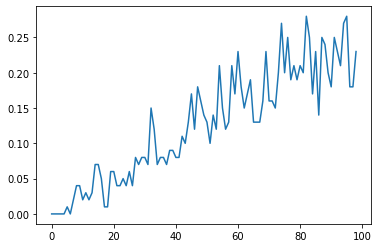

In [253]:
# 演習 9-5の解答
import matplotlib.pyplot as plt
plt.plot(prob)
plt.show()
# 値が0.5にならないので、どこかで間違えているのだと思います。